In [1]:
import numpy as np
import torch
import torchvision

import n3ml.optimizer
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import n3ml.encoder
#import hnkim_encoder

encoder = n3ml.encoder.Simple(time_interval=20)

#hnkimD = hnkim_encoder.SimpleDecoder(time_interval=20)

In [2]:
data='data'
loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST(
            #opt.data,
            data,
            train=False,
            transform=torchvision.transforms.Compose([transforms.ToTensor()])),
        #batch_size=opt.batch_size,
        batch_size=1,
        shuffle=False)

In [3]:
class Simple:
    """ This is a simple version encoder

        It has to inherit base encoder for consistency.

    """
    def __init__(self, time_interval: int = 100, scale: float = 5.0) -> None:
        """

            scale에 대한 고찰
            scale < 1.0인 경우는 more deterministic 특성을 보이게 된다.
            scale > 1.0인 경우는 more stochastic 특성을 보이게 된다. (more realistic spike train)

        :param time_interval:
        :param scale:
        """
        self.time_interval = time_interval
        print("time_interval: ", self.time_interval)
        self.scale = scale
        print("scale: ", self.scale)

    def __call__(self, x: torch.Tensor) -> torch.Tensor:
        # x.size: [1, 28, 28]
        xx = x.unsqueeze(dim=0).repeat(self.time_interval, 1, 1, 1)
        r = torch.rand([self.time_interval] + [_ for _ in x.size()])
        #print("xx: ", xx)
        #print("r: ", r)
        
        return (xx >= self.scale * r).float()

time_interval:  5
scale:  5.0
image shape :  torch.Size([1, 28, 28])
image :  tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0314, 0.4588, 0.9961, 0.8627, 0.3490, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

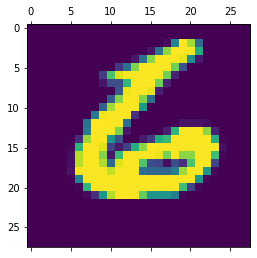

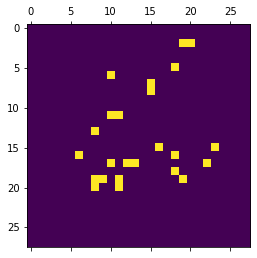

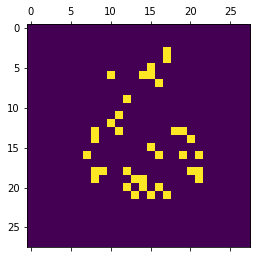

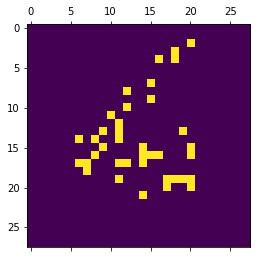

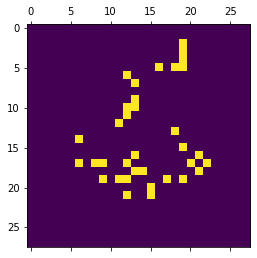

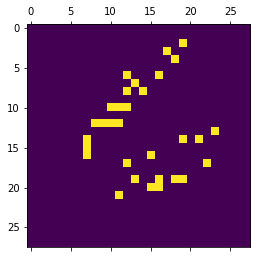

In [23]:
e = Simple(time_interval=5)
for image, label in loader:
    # Squeeze batch dimension
    # Now, batch processing isn't supported
    image = image.squeeze(dim=0)
    label = label.squeeze()
    spiked_image = e(image)
    
#print(spiked_image)


print("image shape : ", image.shape)
print("image : ", image)


print("spiked_image shape : ", spiked_image.shape)
print("spiked_image : ", spiked_image)



#plt.matshow(spiked_image[4,0,])
plt.matshow(image[0,])

plt.matshow(spiked_image[0,0,])
plt.matshow(spiked_image[1,0,])
plt.matshow(spiked_image[2,0,])
plt.matshow(spiked_image[3,0,])
plt.matshow(spiked_image[4,0,])

plt.show()


#print("call.R : ", e.r)


#result = hnkimD.run(spiked_image)

#print("result Shape : ", result.shape)
#print("result : ", result)


